## creation automatisée de playlist spotify

Le dataset est issu de Kaggle: https://www.kaggle.com/tomigelo/spotify-audio-features


La description des attributs du dataset est ici:
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

firstfile = pd.read_csv("SpotifyAudioFeaturesApril2019.csv")
secondfile = pd.read_csv("SpotifyAudioFeaturesNov2018.csv")
print(firstfile.info())
print(secondfile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130663 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

In [2]:
#les 2 fichiers ont la même structure, on peut donc facilement les combiner en un seul fichier 
df = pd.concat([firstfile, secondfile], ignore_index=True)
df.head(10)


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000,9,0.1070,-12.569,1,0.4510,142.111,4,0.180,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847,8,0.0959,-9.008,1,0.0551,120.034,4,0.622,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910,11,0.0727,-8.932,1,0.0697,124.031,4,0.944,0


In [3]:
df.shape

(247035, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247035 entries, 0 to 247034
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       247035 non-null  object 
 1   track_id          247035 non-null  object 
 2   track_name        247035 non-null  object 
 3   acousticness      247035 non-null  float64
 4   danceability      247035 non-null  float64
 5   duration_ms       247035 non-null  int64  
 6   energy            247035 non-null  float64
 7   instrumentalness  247035 non-null  float64
 8   key               247035 non-null  int64  
 9   liveness          247035 non-null  float64
 10  loudness          247035 non-null  float64
 11  mode              247035 non-null  int64  
 12  speechiness       247035 non-null  float64
 13  tempo             247035 non-null  float64
 14  time_signature    247035 non-null  int64  
 15  valence           247035 non-null  float64
 16  popularity        24

In [5]:
# on passe tous les champs object en tant que string
df.astype({"artist_name": str, "track_id": str, "track_name":str})
df.drop_duplicates(subset ="track_id", keep = 'first', inplace=True)

In [6]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130989.000000,130989.000000,1.309890e+05,130989.000000,130989.000000,130989.000000,130989.000000,130989.000000,130989.000000,130989.000000,130989.000000,130989.000000,130989.000000,130989.000000
mean,0.342466,0.581478,2.126767e+05,0.569244,0.223862,5.233035,0.194918,-9.971758,0.607967,0.111966,119.467241,3.878891,0.439682,24.242608
std,0.345645,0.190024,1.231036e+05,0.260368,0.360274,3.602837,0.167787,6.545917,0.488206,0.124297,30.154448,0.514536,0.259075,19.727393
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.640000e+05,0.396000,0.000000,2.000000,0.097500,-11.894000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019310e+05,0.603000,0.000146,5.000000,0.124000,-7.973000,1.000000,0.055800,120.026000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410540e+05,0.776000,0.439000,8.000000,0.236000,-5.681000,1.000000,0.129000,139.621000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


<function matplotlib.pyplot.show(close=None, block=None)>

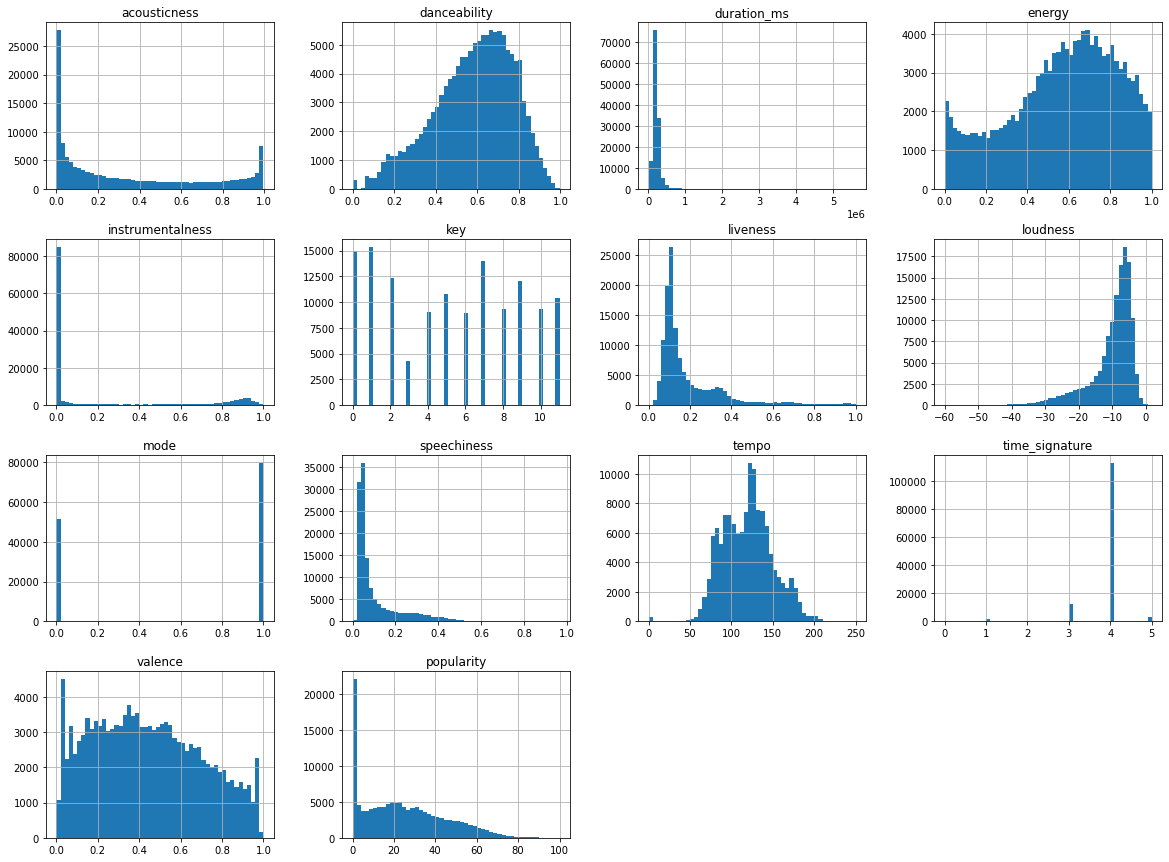

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

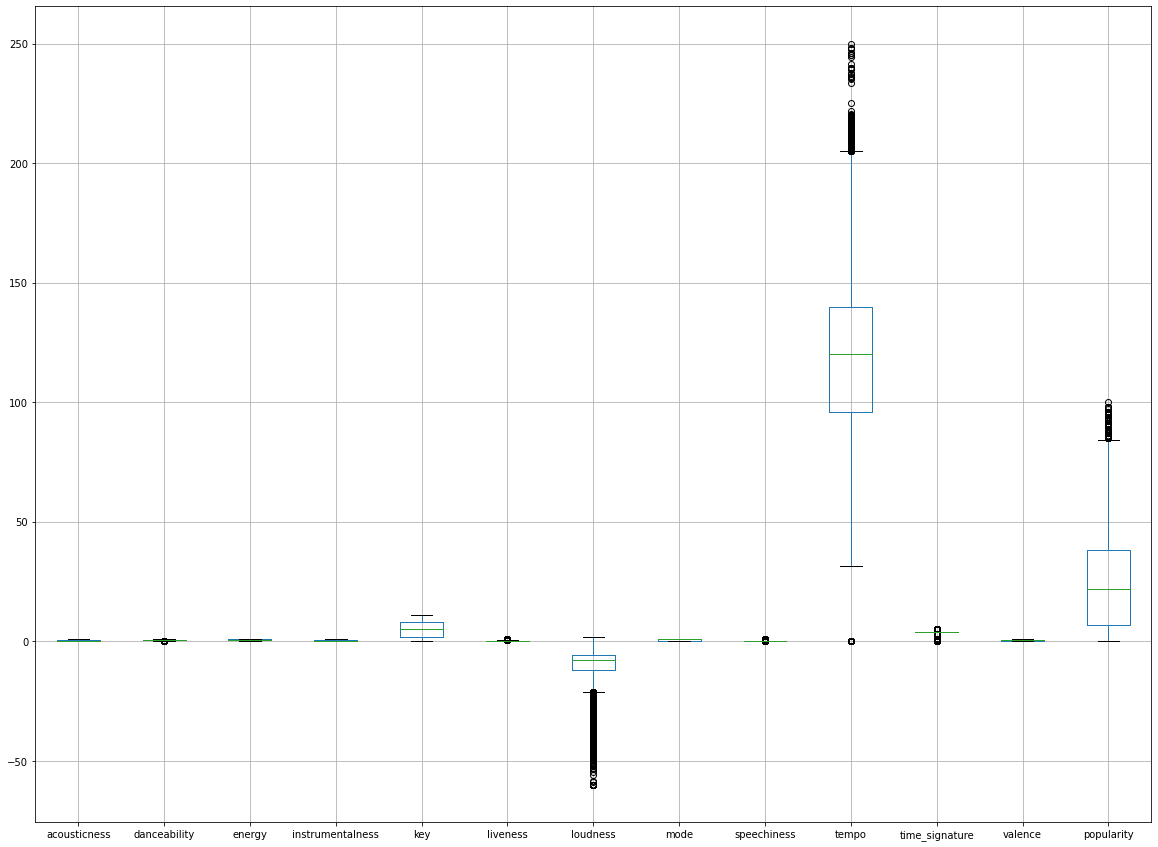

In [8]:
#on enlève duration_ms dont les valeurs sont trop grandes et pas forcément informatives
dfToBoxPlot=df.drop(["duration_ms"],1)
dfToBoxPlot.boxplot(figsize=(20,15))
plt.show

Un petit commentaire ici: la plupart des boxplot ne sont pas visibles pour des problèmes d'échelles. Le moment venu d'enlever les outliers (ou de savoir quoi en faire, tout du moins), il sera intéressant de les afficher une à une pour une meilleure visibilité.

# Etape 1: Pre processing:
    Y a-t-il des valeurs aberrantes (outliers) ou manquantes? Le clustering est-il envisageable?
   
   

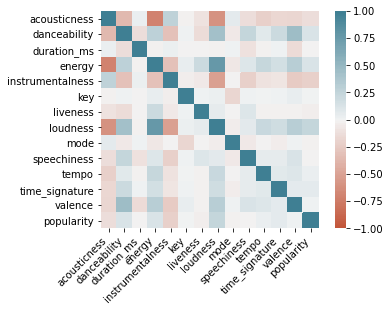

In [9]:
#vérification du dataset
#1 - etude des correlations



import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
# !pip install pyclustertend

In [11]:
#valeurs manquantes :
df.isna().sum().sum()

0

# chercher les outliers éventuels et décider quoi en faire

-basez-vous sur les histogrammes et boxplot présentés précédemment

In [12]:
#archi déconseillé de lancer les lignes suivantes en cours car très long! Le résultat est amené comme image ci-dessous...
#scale dataset

#on enleve les colonnes non numériques
#dfToScale = df.drop(["artist_name","track_id","track_name"],1)
#dfToScale
#from sklearn.preprocessing import MaxAbsScaler
#transformer = MaxAbsScaler().fit(dfToScale)
#transformer.transform(dfToScale)
#
#
#
#from pyclustertend import hopkins

#hopkins(scale(dfToScale), df.shape[0])

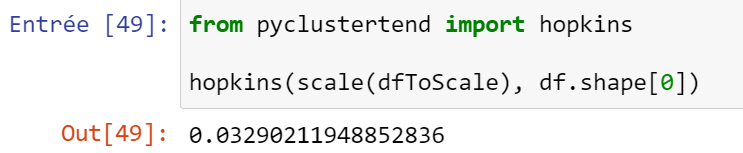

le test est issu de l'implémentation: https://pyclustertend.readthedocs.io/en/latest/
==>Semble-t-il y avoir des clusters?

## Etape 2: normalisation/standardisation
Pour tous les attributs que vous avez conservés suite à l'étape 1:


-Comprenez à quoi ils font référence: semblent-ils utiles ou non pour établir une playlist de morceaux 'qui vont bien ensemble'


-Etudiez leur valeurs max, min et leur dispersion (quartiles, moyenne, médiane, écart type): faut-il les normaliser? Si oui, faites-le!

Hint: dans le commentaire ci-dessus, afin de calculer le test d'Hopkins, j'ai dû passer par une normalisation des colonnes numériques du dataset => Inspirez-vous en, c'est gratuit!

In [13]:
# normalisation standardisation et dernières préparations souhaitées du dataset

df=df.drop('acousticness',1)
df=df.drop('loudness',1)
df=df.drop('track_id',1)
df=df.drop('artist_name',1)
df=df.drop('track_name',1)



In [14]:
#from sklearn.preprocessing import MinMaxScaler
#df_norm=MinMaxScaler().fit(df)

## Etape3 : c'est le moment de s'amuser!

Voilà vos données toutes propres sur elles: à vous de jouer!

Vous avez [ici](https://scikit-learn.org/stable/modules/clustering.html) à disposition tous les outils de clustering de scikit-learn.
[ici](https://scikit-learn.org/stable/modules/clustering.html) à disposition tous les outils de clustering de scikit-learn.

N.B. Comme d'habitude, on suit un processur itératif on teste, on évalue, on améliore :)

In [19]:
#print(df.head())
df_nump = df.to_numpy()


In [20]:
print(df_nump)

[[7.43000e-01 2.38373e+05 3.39000e-01 ... 4.00000e+00 1.18000e-01
  1.50000e+01]
 [8.46000e-01 2.14800e+05 5.57000e-01 ... 4.00000e+00 3.71000e-01
  0.00000e+00]
 [6.03000e-01 1.38913e+05 7.23000e-01 ... 4.00000e+00 3.82000e-01
  5.60000e+01]
 ...
 [3.43000e-01 3.24920e+05 4.87000e-01 ... 4.00000e+00 3.65000e-01
  4.50000e+01]
 [3.80000e-01 4.23377e+05 3.99000e-01 ... 3.00000e+00 1.05000e-01
  4.90000e+01]
 [8.34000e-01 2.40353e+05 5.17000e-01 ... 4.00000e+00 1.93000e-01
  5.30000e+01]]


In [23]:
#application au moins d'un clustering type k-means 
#(avec sélection d'un score et affichage en fonction de k pour appliquer la méthode elbow)


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_scores = {}
inertia_lists = []
silhouette_scores = {}
silhouette_list = []
n_clusters = 2
for k in range (2,20) :
    kmeans = KMeans(n_clusters=k).fit(df_nump)
    clusters= kmeans.predict(df_nump)
    sScore=silhouette_score(df_nump,clusters)
    silhouette_list.append(sScore)
    silhouette_scores[k]=sScore
    inertia_scores[k]=kmeans.inertia_
    inertia_lists.append(kmeans.inertia_)
    


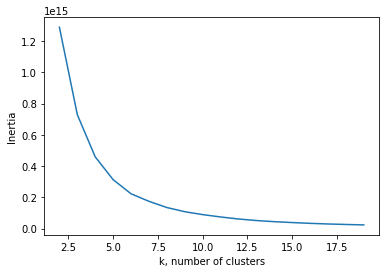

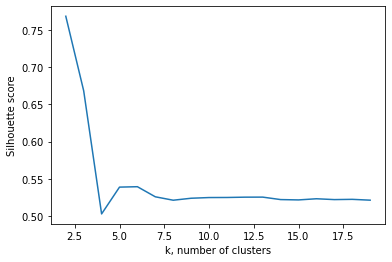

In [24]:
k_range=range(2,20)
plt.plot(k_range,inertia_lists)
plt.xlabel('k, number of clusters')
plt.ylabel('Inertia')
plt.show()

plt.plot(k_range,silhouette_list)
plt.xlabel('k, number of clusters')
plt.ylabel('Silhouette score')
plt.show()

## Etape 4 - question subsidiaire : appliquer DBSCAN, obtient-on de meilleurs résultats?

In [29]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN
from sklearn.cluster import DBSCAN
clustering = DBSCAN().fit(df_nump)
nb_clusters = clustering.fit_predict(df_nump)

In [31]:
print(nb_clusters)
print(clustering)

[-1 -1 -1 ... -1 -1 -1]
DBSCAN()


In [34]:
labels=clustering.labels_

In [35]:
print(clustering.labels_)
print(clustering.core_sample_indices_)

[-1 -1 -1 ... -1 -1 -1]
[     4     10     13     15     16     18     19     21     37     38
    184    440    775    792    891   1158   1800   1925   1934   1959
   1988   2005   2018   2031   2063   2073   2135   2139   2218   2221
   2276   2351   2361   2444   2604   2605   2703   2783   2800   2801
   2802   2804   2810   2813   2815   2821   2827   2830   2843   2852
   2853   2864   2872   3189   3441   3855   3916   3949   3976   4007
   4101   4179   4186   4491   4493   5518   5612   5819   5907   6050
   6122   6144   6355   6378   6434   6611   6709   6819   6830   6950
   7231   7245   7258   7269   7417   7996   8191   8386   8405   8825
   9409   9768   9902  10450  10541  10579  10912  11272  11574  12316
  13480  13728  14927  15555  19851  22436  22437  22438  22441  22443
  22444  22445  22446  22447  22449  22450  22452  22453  22454  24922
  24923  24924  24925  25053  25054  25063  25064  25065  25066  25067
  25068  25069  25070  25071  25072  25073  25074  25

In [37]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [38]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 47
Estimated number of noise points: 130570
